In [168]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import warnings
warnings.simplefilter('ignore')


In [169]:
USA_All_Bee_loses_2_df= pd.read_csv('../Final Project.Sarah/Final_Total_Losses.csv')
Bee_df= USA_All_Bee_loses_2_df.drop(USA_All_Bee_loses_2_df.columns[[0,1]], axis=1) 
Bee_df.head()

,Winter_2015,Spring_2015,Summer_2015,Fall_2015,Total_2015,Winter_2016,Spring_2016,Summer_2016,Fall_2016,Total_2016,Winter_2017,Spring_2017,Summer_2017,Fall_2017,Total_2017,Winter_2018,Spring_2018,2018_total
0,1800,860,1400,610,4670,1700,930,1200,610,4440,1600,440,900,990,3930,820,810,1630
1,4600,5500,6000,12000,28100,4700,3700,6000,6500,20900,6000,2600,4100,6500,19200,6000,2600,8600
2,1500,1900,9000,2400,14800,5000,3400,1500,2500,12400,3500,1900,6000,7500,18900,7500,1500,9000
3,255000,104000,76000,149000,584000,200000,108000,82000,205000,595000,195000,90000,67000,155000,507000,220000,70000,290000
4,1500,1900,4500,2500,10400,750,1800,6500,4500,13550,1100,4500,4300,7000,16900,4900,2300,7200


In [170]:
#Bee_df=Bee_df_with_california.drop(Bee_df_with_california.index[3]).reset_index()
#Bee_df

In [171]:
Bee_df.columns

Index(['Winter_2015', 'Spring_2015', 'Summer_2015', 'Fall_2015', 'Total_2015',
       'Winter_2016', 'Spring_2016', 'Summer_2016', 'Fall_2016', 'Total_2016',
       'Winter_2017', 'Spring_2017', 'Summer_2017', 'Fall_2017', 'Total_2017',
       'Winter_2018', 'Spring_2018', '2018_total'],
      dtype='object')

#                                    Winter 2018 Prediction Test

In [173]:
# Assign X (data) and y (target)

X = Bee_df[['Winter_2015', 'Winter_2016', 'Winter_2017']]
y = Bee_df["Winter_2018"].values.reshape(-1, 1)
print(X.shape, y.shape)


(46, 3) (46, 1)


In [174]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [175]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [176]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [177]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

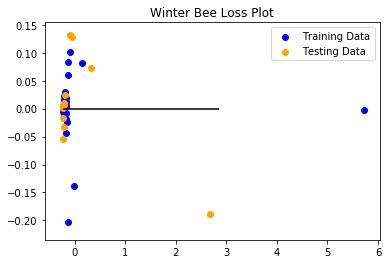

In [178]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Winter Bee Loss Plot")
plt.show()


In [179]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"Mean Squared Error (MSE): {MSE}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 0.006661642547282577
R-squared (R2 ): 0.9907201767542717


In [180]:
# Call the `score` method on the model to show the r2 score

model.score(X_test, y_test)


0.9932480977311497

#                                     Spring 2018 Prediction Test

In [181]:
# Assign X (data) and y (target)

X = Bee_df[['Spring_2015', 'Spring_2016', 'Spring_2017',]]
y = Bee_df["Spring_2018"].values.reshape(-1, 1)
print(X.shape, y.shape)


(46, 3) (46, 1)


In [182]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [183]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [184]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [185]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

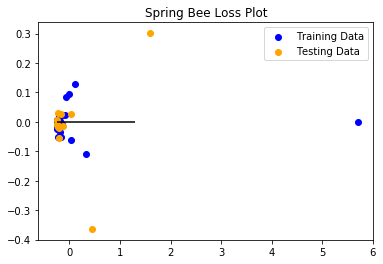

In [186]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Spring Bee Loss Plot")
plt.show()


In [187]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"Mean Squared Error (MSE): {MSE}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.019060062936492744
R-squared (R2 ): 0.9156849996087719


In [188]:
# Call the `score` method on the model to show the r2 score

model.score(X_test, y_test)


0.8691836564476333

#                                 2018 Total Bee Loss Prediction

In [189]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = Bee_df[['Total_2015', 'Total_2016', 'Total_2017']]
y = Bee_df[['2018_total']].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (46, 3) (46, 1)


In [190]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [191]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [192]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [193]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

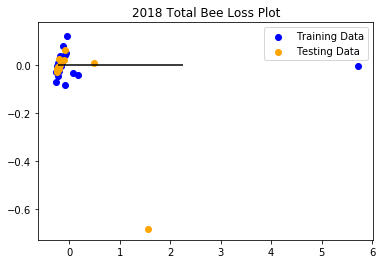

In [194]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("2018 Total Bee Loss Plot")
plt.show()


In [195]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"Mean Squared Error (MSE): {MSE}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.03962558706935424
R-squared (R2 ): 0.9159983507539184


In [196]:
# Call the `score` method on the model to show the r2 score

model.score(X_test, y_test)


0.6383603112723096